BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 9.1 Introduction

Causality

If A/B groups could be selected at random, we could make causal conclusions

In [2]:
# result 1 means improvement
bta = Table.read_table('../../data/bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [3]:
bta.group('Group')

Group,count
Control,16
Treatment,15


In [4]:
# count sum of successes
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [5]:
# success percentage, by chance?
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


Lec 9.2 Hypotheses

Null Hypothesis: by chance

In [6]:
# simulation of mind experiment behind the test
observed_outcomes = Table.read_table('../../data/observed_outcomes.csv')
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


Lec 9.3 Test Statistic

Compares 1's in two groups

Null: they should be the same

In [7]:
# proportion of one's
obs_proportions = bta.group('Group', np.average).column(1)
obs_proportions

array([0.125, 0.6  ])

In [8]:
# statistic: distance from observation proportions
observed_distance = abs(obs_proportions.item(0) - obs_proportions.item(1))
observed_distance

0.475

Lec 9.4 Performing a Test

Simulate the statistic under Null Hypothesis

In [9]:
labels = bta.select('Group')
results = bta.select('Result')

In [10]:
# calculate random distance
shuffled_results = results.sample(with_replacement=False).column(0)
shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
proportions = shuffled_tbl.group('Group', np.average).column(1)
abs(proportions.item(0) - proportions.item(1))

0.041666666666666685

In [11]:
iterations = 20_000
distances = np.empty(iterations)

for i in range(iterations):
    shuffled_results = results.sample(with_replacement=False).column(0)
    shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
    proportions = shuffled_tbl.group('Group', np.average).column(1)
    distances[i] = abs(proportions.item(0) - proportions.item(1))

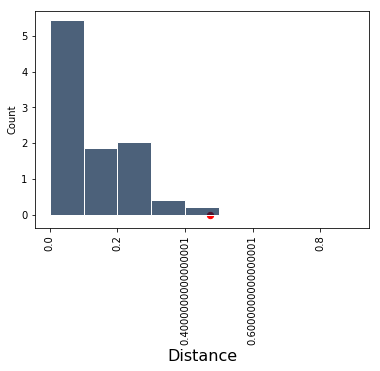

In [12]:
Table().with_column('Distance', distances).hist(
    bins=np.arange(0, 1, 0.1), ec='w', normed=None, density=True)
plt.scatter(observed_distance, 0, color='red', s=40);

In [13]:
# P-value is quite small, we should reject the Null Hypothesis
np.count_nonzero(distances >= observed_distance) / 20000

0.0093